In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('p9_FS_combined.csv')

In [3]:
df.head()

,of_confidence,of_success,of_gaze_0_x,of_gaze_0_y,of_gaze_0_z,of_gaze_1_x,of_gaze_1_y,of_gaze_1_z,of_gaze_angle_x,of_gaze_angle_y,...,skill_OS,skill_EM,no_game,engagement,harmonicity,intensity,mfcc_0,mfcc_1,pitch_frequency,pitch_strength
0,0.03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,-200.0,49.170,764.698,336.938,870.282,0.695
1,0.03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,-200.0,59.034,842.686,320.414,6007.589,0.674
2,0.03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,-200.0,55.560,1111.093,262.214,6369.986,0.760
3,0.38,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,-200.0,51.352,1007.680,294.262,946.231,0.399
4,0.03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,-200.0,51.147,894.887,285.218,933.616,0.402


In [4]:
df_audio = df[['engagement','harmonicity','intensity','mfcc_0','mfcc_1','pitch_frequency','pitch_strength']]

In [5]:
df_audio.head()

,engagement,harmonicity,intensity,mfcc_0,mfcc_1,pitch_frequency,pitch_strength
0,1,-200.0,49.170,764.698,336.938,870.282,0.695
1,1,-200.0,59.034,842.686,320.414,6007.589,0.674
2,1,-200.0,55.560,1111.093,262.214,6369.986,0.760
3,1,-200.0,51.352,1007.680,294.262,946.231,0.399
4,1,-200.0,51.147,894.887,285.218,933.616,0.402


In [6]:
print(len(df_audio))
df_audio = df_audio.dropna()
print(len(df_audio))

444085
442228


C:\Users\bthia\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\bthia\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bthia\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bthia\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\bthia\Anaconda

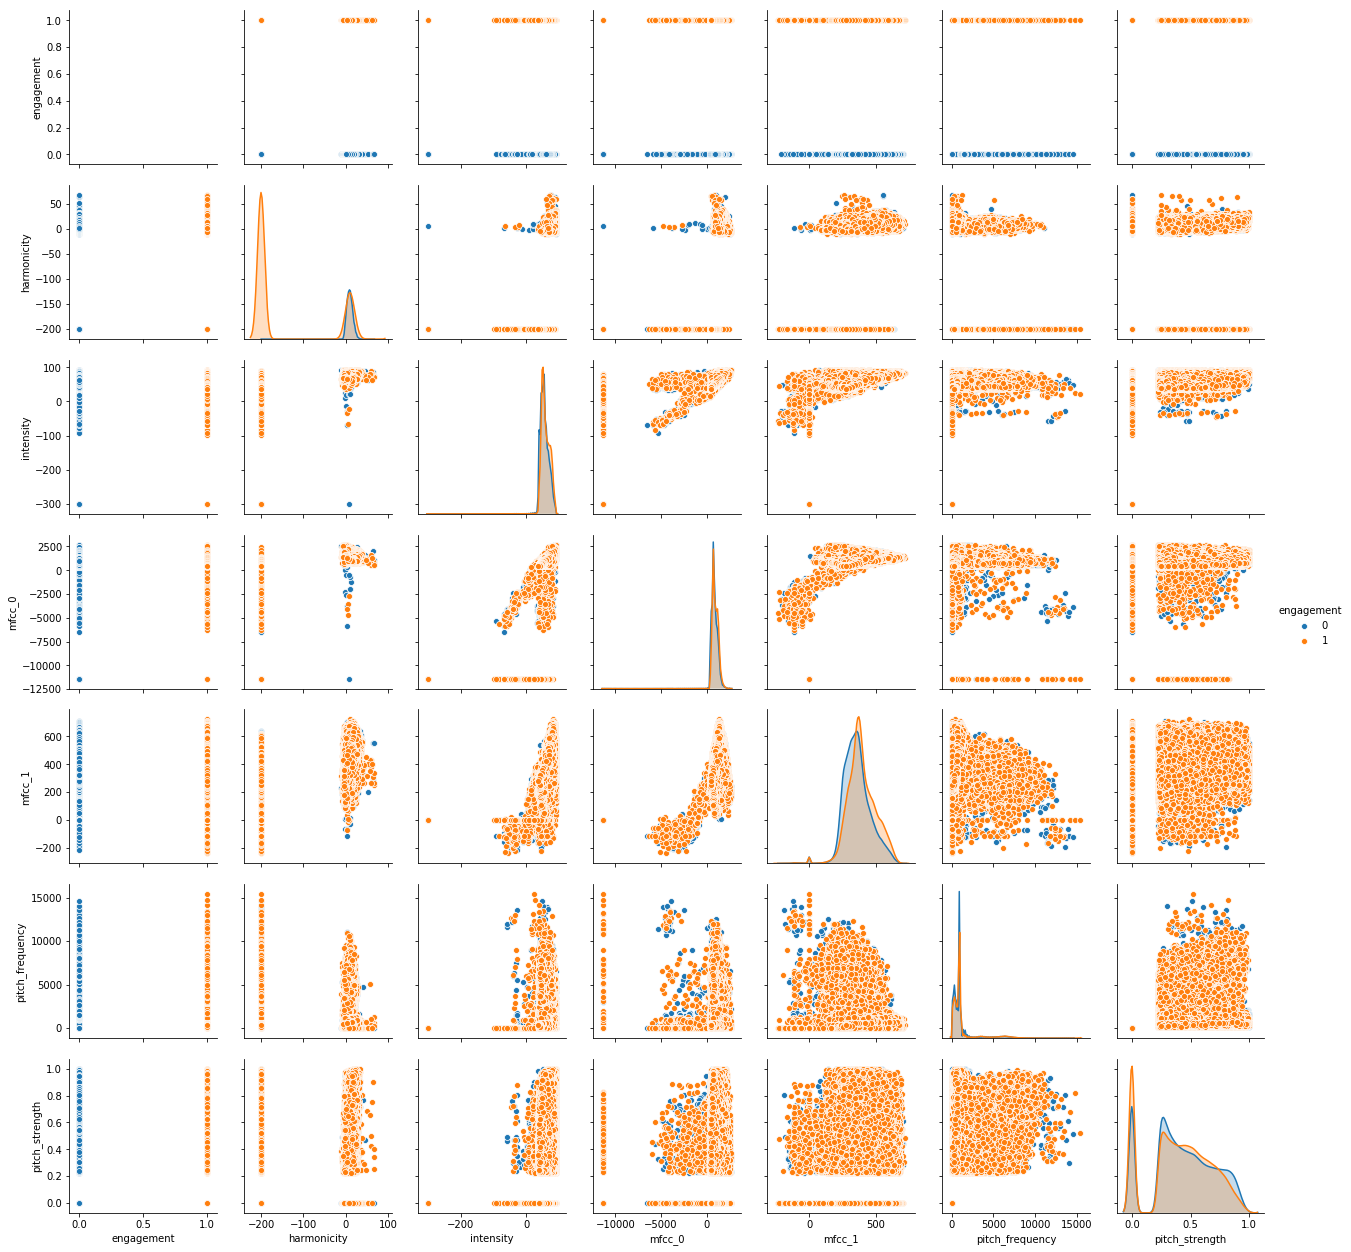

In [7]:
sns.pairplot(df_audio,hue='engagement') 

In [10]:
# harmonicity
print("Mean", np.mean(df['harmonicity']))
print("Std Dev", np.std(df['harmonicity']))
print("Min",min(df['harmonicity']))
print("Max",max(df['harmonicity']))

('Mean', -146.88282990900714)
('Std Dev', 91.38009774191086)
('Min', -200.0)
('Max', 67.73899999999999)


In [11]:
# intensity
print("Mean", np.mean(df['intensity']))
print("Std Dev", np.std(df['intensity']))
print("Min",min(df['intensity']))
print("Max",max(df['intensity']))

('Mean', 57.36067832656457)
('Std Dev', 19.60770167066869)
('Min', -300.0)
('Max', 92.145)


In [12]:
# mfcc_0
print("Mean", np.mean(df['mfcc_0']))
print("Std Dev", np.std(df['mfcc_0']))
print("Min",min(df['mfcc_0']))
print("Max",max(df['mfcc_0']))

('Mean', 878.080317594077)
('Std Dev', 890.7401636496984)
('Min', -11400.0)
('Max', 2685.257)


In [13]:
# mfcc_1
print("Mean", np.mean(df['mfcc_1']))
print("Std Dev", np.std(df['mfcc_1']))
print("Min",min(df['mfcc_1']))
print("Max",max(df['mfcc_1']))

('Mean', 380.56978924219993)
('Std Dev', 102.80935034053006)
('Min', -238.50900000000001)
('Max', 721.1610000000001)


In [14]:
# pitch_frequency
print("Mean", np.mean(df['pitch_frequency']))
print("Std Dev", np.std(df['pitch_frequency']))
print("Min",min(df['pitch_frequency']))
print("Max",max(df['pitch_frequency']))

('Mean', 1010.5927968469011)
('Std Dev', 1514.8239483022717)
('Min', 0.0)
('Max', 15401.456)


In [15]:
# pitch_strength
print("Mean", np.mean(df['pitch_strength']))
print("Std Dev", np.std(df['pitch_strength']))
print("Min",min(df['pitch_strength']))
print("Max",max(df['pitch_strength']))

('Mean', 0.42898004423055774)
('Std Dev', 0.2604154907038651)
('Min', 0.0)
('Max', 0.9990000000000001)


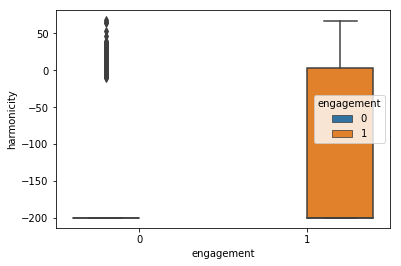

In [16]:
# Boxplots
sns.boxplot(x='engagement', y='harmonicity', hue='engagement', data=df_audio)

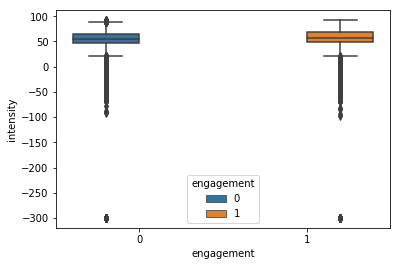

In [18]:
sns.boxplot(x='engagement', y='intensity', hue='engagement', data=df_audio)

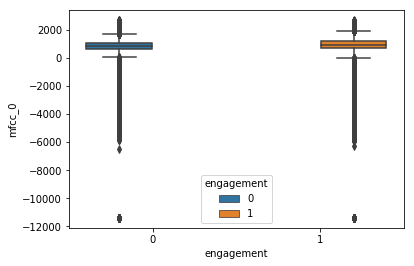

In [19]:
sns.boxplot(x='engagement', y='mfcc_0', hue='engagement', data=df_audio)

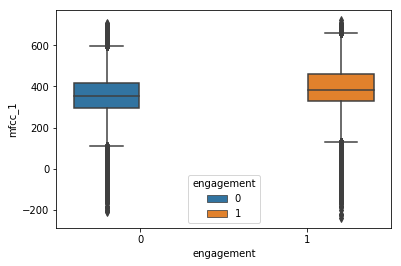

In [20]:
sns.boxplot(x='engagement', y='mfcc_1', hue='engagement', data=df_audio)

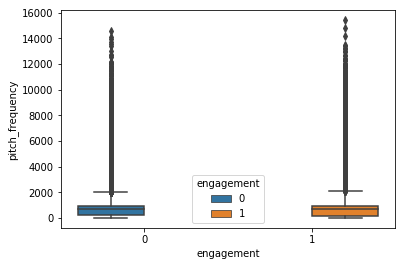

In [21]:
sns.boxplot(x='engagement', y='pitch_frequency', hue='engagement', data=df_audio)

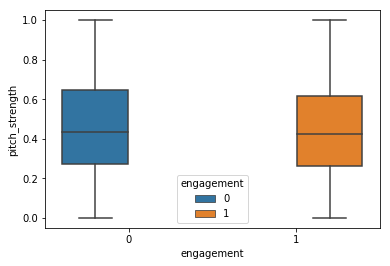

In [22]:
sns.boxplot(x='engagement', y='pitch_strength', hue='engagement', data=df_audio)